In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

In [2]:
data_validation_path = "./data/validations-reseau-ferre-nombre-validations-par-jour-1er-semestre.csv"

df_validation = pd.read_csv(data_validation_path, sep=";", parse_dates=["JOUR"], dayfirst=False)
df_validation.head()

,JOUR,CODE_STIF_TRNS,CODE_STIF_RES,CODE_STIF_ARRET,LIBELLE_ARRET,ID_REFA_LDA,CATEGORIE_TITRE,NB_VALD
0,2022-01-22,800,854,712,PUTEAUX,71422,IMAGINE R,166
1,2022-01-22,800,854,783,SANTEUIL-LE-PERCHAY,67196,NAVIGO,11
2,2022-01-22,800,854,801,SEVRES-VILLE-D'AVRAY,70686,FGT,5
3,2022-01-22,800,854,801,SEVRES-VILLE-D'AVRAY,70686,NAVIGO,10
4,2022-01-22,800,854,82,BOIS-COLOMBES,72179,FGT,79


In [3]:
JOUR = "JOUR"
CODE_STIF_TRNS = "CODE_STIF_TRNS"
CODE_STIF_RES = "CODE_STIF_RES"
CODE_STIF_ARRET = "CODE_STIF_ARRET"
LIBELLE_ARRET = "LIBELLE_ARRET"
ID_REFA_LDA = "ID_REFA_LDA"
CATEGORIE_TITRE = "CATEGORIE_TITRE"
NB_VALD = "NB_VALD"

In [4]:

df_validation = df_validation.drop_duplicates()


In [5]:

df_validation.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1088334 entries, 0 to 1088333
Data columns (total 8 columns):
 #   Column           Non-Null Count    Dtype         
---  ------           --------------    -----         
 0   JOUR             1088334 non-null  datetime64[ns]
 1   CODE_STIF_TRNS   1088334 non-null  int64         
 2   CODE_STIF_RES    1088334 non-null  object        
 3   CODE_STIF_ARRET  1088334 non-null  object        
 4   LIBELLE_ARRET    1088334 non-null  object        
 5   ID_REFA_LDA      1088334 non-null  int64         
 6   CATEGORIE_TITRE  1088334 non-null  object        
 7   NB_VALD          1088334 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 66.4+ MB


Nombres de valeurs uniques dans la colonne JOUR :  181
Nombres de valeurs uniques dans la colonne CODE_STIF_TRNS :  3
Nombres de valeurs uniques dans la colonne CODE_STIF_RES :  13
Nombres de valeurs uniques dans la colonne CODE_STIF_ARRET :  751
Nombres de valeurs uniques dans la colonne LIBELLE_ARRET :  729
Nombres de valeurs uniques dans la colonne ID_REFA_LDA :  718
Nombres de valeurs uniques dans la colonne CATEGORIE_TITRE :  9
Nombres de valeurs uniques dans la colonne NB_VALD :  15587


Text(0.5, 0, 'Nombre de valeurs uniques')

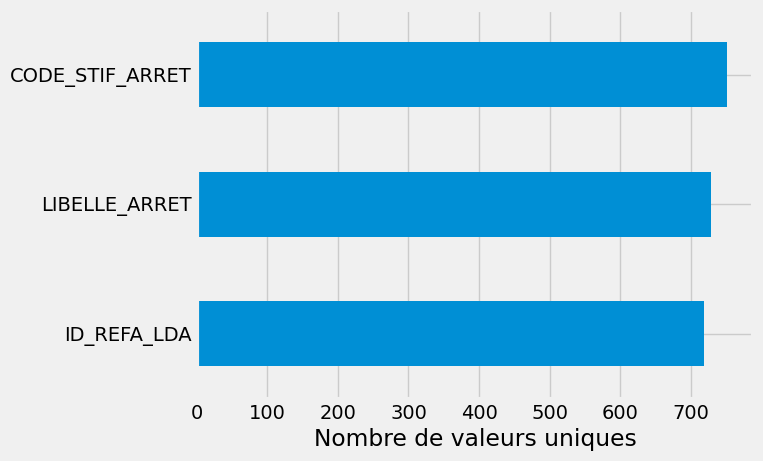

In [6]:
# check unique values per column
unique_vals = {}
for column in df_validation.columns:
    unique_vals[column] = len(df_validation[column].unique())
    print(f"Nombres de valeurs uniques dans la colonne {column} : ", len(df_validation[column].unique()))
df_unique_vals = pd.Series(unique_vals)
df_unique_vals[[ID_REFA_LDA, LIBELLE_ARRET, CODE_STIF_ARRET]].plot.barh()
plt.xlabel("Nombre de valeurs uniques")

#### **Note** : Il semble y avoir plus de valeurs dans `LIBELLE_ARRET` (noms de stations) que de `ID_REFA_LDA`. Certains noms de station sont écrits de plusieurs façons. Voir ci-après. 

In [7]:
df_validation[df_validation.LIBELLE_ARRET.str.contains("CLICHY")].LIBELLE_ARRET.unique()

array(['CLICHY ST-OUEN', 'MAIRIE DE CLICHY', 'PLACE DE CLICHY',
       'PORTE DE CLICHY', 'PTE DE CLICHY', 'CLICHY-LEVALLOIS',
       'PORTE-DE-CLICHY'], dtype=object)

#### **Question métier** : Comment gère-t-on les noms tels que `'PORTE-DE-CLICHY'`, `'PTE DE CLICHY'` et `'PORTE DE CLICHY'`?  Sachant que ces stations n'ont pas les mêmes codes ?

In [8]:
clichy = df_validation[df_validation.LIBELLE_ARRET.str.contains("CLICHY")]
clichy[clichy[ID_REFA_LDA] == 71545]

,JOUR,CODE_STIF_TRNS,CODE_STIF_RES,CODE_STIF_ARRET,LIBELLE_ARRET,ID_REFA_LDA,CATEGORIE_TITRE,NB_VALD
201,2022-01-23,100,110,1229,CLICHY ST-OUEN,71545,AUTRE TITRE,264
536,2022-01-23,100,110,689,PORTE DE CLICHY,71545,AMETHYSTE,108
537,2022-01-23,100,110,689,PORTE DE CLICHY,71545,TST,298
538,2022-01-23,100,110,689,PTE DE CLICHY,71545,?,101
539,2022-01-23,100,110,689,PTE DE CLICHY,71545,NAVIGO,2977
...,...,...,...,...,...,...,...,...
1087384,2022-02-23,100,110,1229,CLICHY ST-OUEN,71545,?,129
1087385,2022-02-23,100,110,1229,CLICHY ST-OUEN,71545,AMETHYSTE,132
1087918,2022-02-23,800,803,688,PORTE-DE-CLICHY,71545,AUTRE TITRE,68
1088261,2022-02-23,100,110,689,PORTE DE CLICHY,71545,AUTRE TITRE,53


In [9]:
df_validation[df_validation.LIBELLE_ARRET.str.contains("BERCY")].ID_REFA_LDA.unique()

array([71607, 73652])

In [10]:
df_validation[df_validation[LIBELLE_ARRET] == "GARE DE LYON"].ID_REFA_LDA.unique()

array([73626])

In [11]:
df_validation[df_validation.LIBELLE_ARRET.str.contains("L'AUMONE")]

,JOUR,CODE_STIF_TRNS,CODE_STIF_RES,CODE_STIF_ARRET,LIBELLE_ARRET,ID_REFA_LDA,CATEGORIE_TITRE,NB_VALD
13,2022-01-22,800,854,834,SAINT-OUEN-L'AUMONE-QUARTIER DE L'EGLISE,66731,TST,29
1210,2022-01-29,800,853,833,SAINT-OUEN-L'AUMONE,66803,AMETHYSTE,21
1211,2022-01-29,800,853,833,SAINT-OUEN-L'AUMONE,66803,NON DEFINI,69
1322,2022-01-29,800,854,834,SAINT-OUEN-L'AUMONE-QUARTIER DE L'EGLISE,66731,AMETHYSTE,5
1323,2022-01-29,800,854,834,SAINT-OUEN-L'AUMONE-QUARTIER DE L'EGLISE,66731,IMAGINE R,48
...,...,...,...,...,...,...,...,...
1087104,2022-02-22,800,853,961,SAINT-OUEN-L'AUMONE-LIESSE,66659,NAVIGO,1315
1087105,2022-02-22,800,853,961,SAINT-OUEN-L'AUMONE-LIESSE,66659,NON DEFINI,74
1087178,2022-02-22,800,854,834,SAINT-OUEN-L'AUMONE-QUARTIER DE L'EGLISE,66731,AMETHYSTE,6
1087179,2022-02-22,800,854,834,SAINT-OUEN-L'AUMONE-QUARTIER DE L'EGLISE,66731,NAVIGO,274


# Quelles sont les 20 premières stations en terme de validations ?

In [9]:
df_premiers_arrets_semestre = df_validation[[LIBELLE_ARRET, NB_VALD]].groupby(LIBELLE_ARRET).sum().sort_values(by=NB_VALD, ascending=False)
df_premiers_arrets_semestre = df_premiers_arrets_semestre.reset_index()
df_premiers_arrets_semestre


,LIBELLE_ARRET,NB_VALD
0,SAINT-LAZARE,28903407
1,LA DEFENSE-GRANDE ARCHE,19419917
2,GARE DE LYON,16747826
3,CHATELET-LES HALLES,14071993
4,MONTPARNASSE,13762736
...,...,...
724,CHAPONVAL,4880
725,MONTGEROULT-COURCELLES,4634
726,MONNERVILLE,3867
727,GUILLERVAL,2277


# Proposez une illustration graphique de ce classement ?


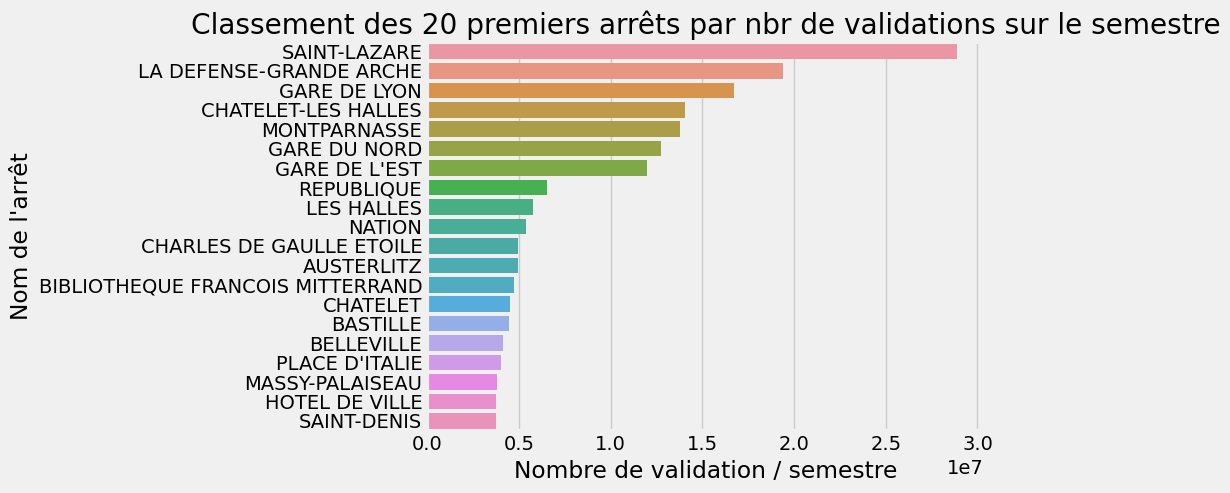

In [10]:
sns.barplot(data=df_premiers_arrets_semestre.head(20),y=LIBELLE_ARRET, x=NB_VALD)
plt.xticks(rotation='vertical')
plt.ylabel("Nom de l'arrêt")
plt.xlabel("Nombre de validation / semestre")
plt.title("Classement des 20 premiers arrêts par nbr de validations sur le semestre")
plt.xticks(rotation=0)
plt.show()

# Proposez une classification des arrêts en vous basant uniquement sur le nombre de validations par titre de transport ?

In [11]:
df_classement_titre =  df_validation[[LIBELLE_ARRET, NB_VALD, CATEGORIE_TITRE]].groupby([LIBELLE_ARRET,CATEGORIE_TITRE]).sum().sort_values(by=[NB_VALD], ascending=False).reset_index()
df_classement_titre.head(20)

,LIBELLE_ARRET,CATEGORIE_TITRE,NB_VALD
0,SAINT-LAZARE,NAVIGO,19125536
1,LA DEFENSE-GRANDE ARCHE,NAVIGO,12841434
2,GARE DE LYON,NAVIGO,10155409
3,MONTPARNASSE,NAVIGO,8082878
4,CHATELET-LES HALLES,NAVIGO,7809022
5,GARE DE L'EST,NAVIGO,7522996
6,GARE DU NORD,NAVIGO,7332129
7,SAINT-LAZARE,IMAGINE R,4445716
8,LA DEFENSE-GRANDE ARCHE,IMAGINE R,3372956
9,LES HALLES,NAVIGO,3367520


# Quelles prédictions pouvez-vous faire pour le nombre de validations dans les stations "OLYMPIADES" et "M. MONTROUGE" sur la période du 24 au 30 juin et les comparer par rapport à la réalité ?


### Approche : Soit on construit un modèle pour chaque station, soit on construit un modèle pour les deux stations. On va d'abord partir avec un modèle pour chaque station. La démarche s'appliquera à un plus grand dataset.

In [12]:
# create constants for convenience, especially since we have a space in 'M. MONTROUGE'
OLYMPIADES = "OLYMPIADES"
MONTROUGE = "M. MONTROUGE"

In [13]:
used_columns = [JOUR, LIBELLE_ARRET, NB_VALD, CATEGORIE_TITRE]

def select_station(df: pd.DataFrame, nom_station: str) -> pd.DataFrame:
    validation_station = df[df[LIBELLE_ARRET].str.lower().str.contains(nom_station.lower())]
    validation_station = validation_station[used_columns]
    #validation_station = validation_station.reset_index(drop=True)
    validation_station = validation_station.sort_values(by=JOUR).reset_index(drop=True)
    validation_station = validation_station.astype({NB_VALD: float})
    return validation_station

validation_olympiades = select_station(df=df_validation, nom_station="OLYMPIADES")
validation_montrouge = select_station(df=df_validation, nom_station="M. MONTROUGE")


In [14]:
validation_olympiades.head()

,JOUR,LIBELLE_ARRET,NB_VALD,CATEGORIE_TITRE
0,2022-01-01,OLYMPIADES,664.0,IMAGINE R
1,2022-01-01,OLYMPIADES,199.0,FGT
2,2022-01-01,OLYMPIADES,462.0,NON DEFINI
3,2022-01-01,OLYMPIADES,5.0,NAVIGO JOUR
4,2022-01-01,OLYMPIADES,216.0,AUTRE TITRE


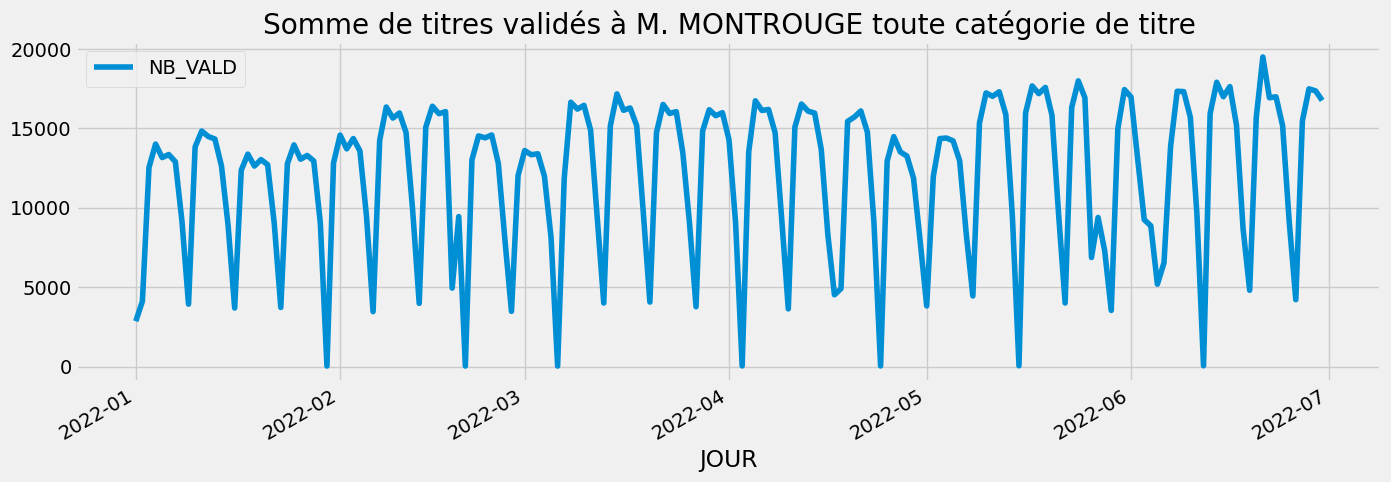

In [15]:
# visualisation de la somme des titre validées à Montrouge par exemple
def plot_titre_par_jour(station: str) -> None:
    df_station = select_station(df=df_validation, nom_station=station)

    df_station_jour = df_station[[NB_VALD, JOUR]].groupby(JOUR).sum().reset_index()
    fig, ax = plt.subplots(figsize=(15, 5))
    df_station_jour[[JOUR, NB_VALD]].set_index(JOUR).plot(ax=ax, title=f"Somme de titres validés à {station} toute catégorie de titre")
    plt.show()
    df_station_jour

plot_titre_par_jour(station="M. MONTROUGE")

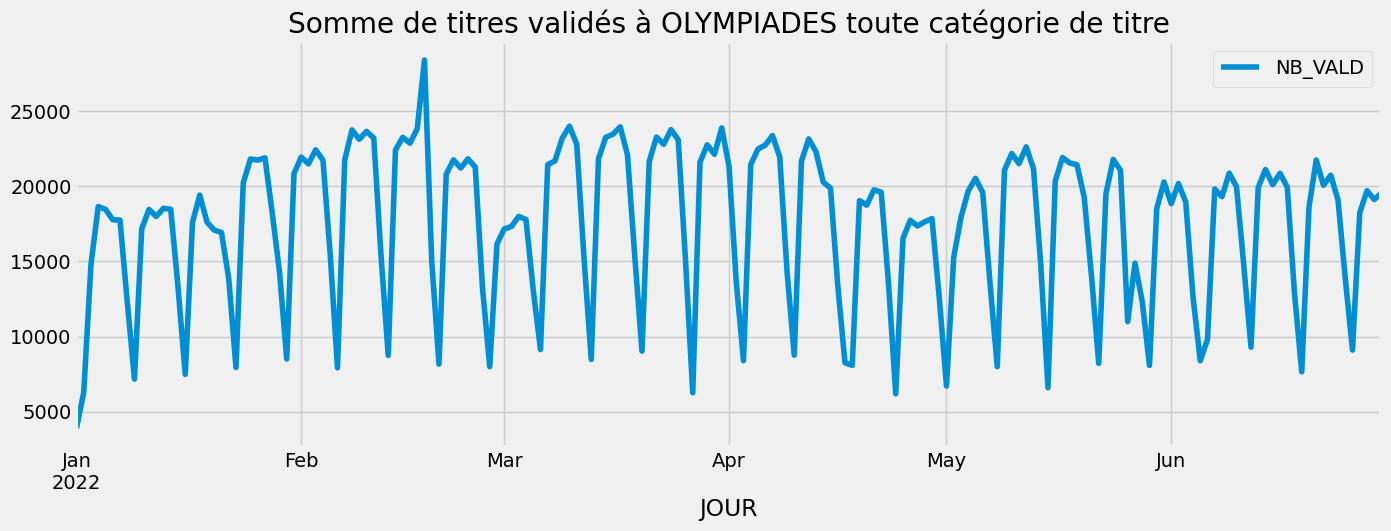

In [16]:
plot_titre_par_jour(station="OLYMPIADES")

In [17]:
def days_min_vald(df: pd.DataFrame, station: str, threshold: float = 5000) -> pd.Series:
    validation_station = select_station(df = df, nom_station=station)
    somme_titres_valides = validation_station[[JOUR, NB_VALD]].groupby(JOUR).sum().sort_values(NB_VALD)
    # jours avec le moins de titre validé
    return somme_titres_valides[somme_titres_valides.NB_VALD <= threshold].reset_index().JOUR.dt.day_name().value_counts()


In [18]:
days_min_vald(df=df_validation, station="M. MONTROUGE")

JOUR
Sunday      25
Saturday     1
Monday       1
Friday       1
Name: count, dtype: int64

In [19]:
days_min_vald(df=df_validation, station="OLYMPIADES")

JOUR
Saturday    1
Name: count, dtype: int64

Les jours les moins fréquentés sont généralement le Dimanche pour les deux stations. 

## Feature Engineering

In [20]:

def feature_engineering(df: pd.DataFrame) -> pd.DataFrame:
    copy_df = df.copy()
    # changing '?' to INCONNU
    copy_df[CATEGORIE_TITRE] = copy_df[CATEGORIE_TITRE].replace("?", "INCONNU")
    copy_df["jour_de_la_semaine"] = copy_df[JOUR].dt.day_of_week
    copy_df["mois"] = copy_df[JOUR].dt.month
    copy_df["numero_jour"] = copy_df[JOUR].dt.day

    columns_to_encode = [CATEGORIE_TITRE]

    df_encoded = pd.get_dummies(copy_df, columns=columns_to_encode, prefix_sep="_", drop_first=True, dtype=int)
    df_encoded = df_encoded.astype({NB_VALD: float})
    del copy_df
    return df_encoded


In [21]:
    
    
montrouge_engineer = feature_engineering(df=validation_montrouge)
olympiades_engineer = feature_engineering(df=validation_olympiades)


In [22]:

date_to_split = pd.to_datetime("2022-06-15")
def split_data(df: pd.DataFrame, date_to_split=date_to_split) -> tuple:
    """
    Splits the dataframe into train and test set. 
    train set consists of records before date_to_spit
    while the test consist of the remaining records.
    Both datasets are reindexed to the date column (for display)
    """
    train = df[df.JOUR < date_to_split]#.set_index(JOUR, drop=False)
    test = df[df.JOUR >= date_to_split]#.set_index(JOUR, drop=False)
    return train, test

In [23]:
montrouge_train, montrouge_test = split_data(df=montrouge_engineer)
olympiades_train, olympiades_test = split_data(df=olympiades_engineer)


In [24]:
olympiades_test.head()

,JOUR,LIBELLE_ARRET,NB_VALD,jour_de_la_semaine,mois,numero_jour,CATEGORIE_TITRE_AUTRE TITRE,CATEGORIE_TITRE_FGT,CATEGORIE_TITRE_IMAGINE R,CATEGORIE_TITRE_INCONNU,CATEGORIE_TITRE_NAVIGO,CATEGORIE_TITRE_NAVIGO JOUR,CATEGORIE_TITRE_NON DEFINI,CATEGORIE_TITRE_TST
1485,2022-06-15,OLYMPIADES,11585.0,2,6,15,0,0,0,0,1,0,0,0
1486,2022-06-15,OLYMPIADES,20.0,2,6,15,0,0,0,0,0,1,0,0
1487,2022-06-15,OLYMPIADES,1004.0,2,6,15,0,0,0,0,0,0,0,1
1488,2022-06-15,OLYMPIADES,1598.0,2,6,15,0,0,0,0,0,0,1,0
1489,2022-06-15,OLYMPIADES,3697.0,2,6,15,0,0,1,0,0,0,0,0


In [25]:
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

### Display the split of the dataset Montrouge

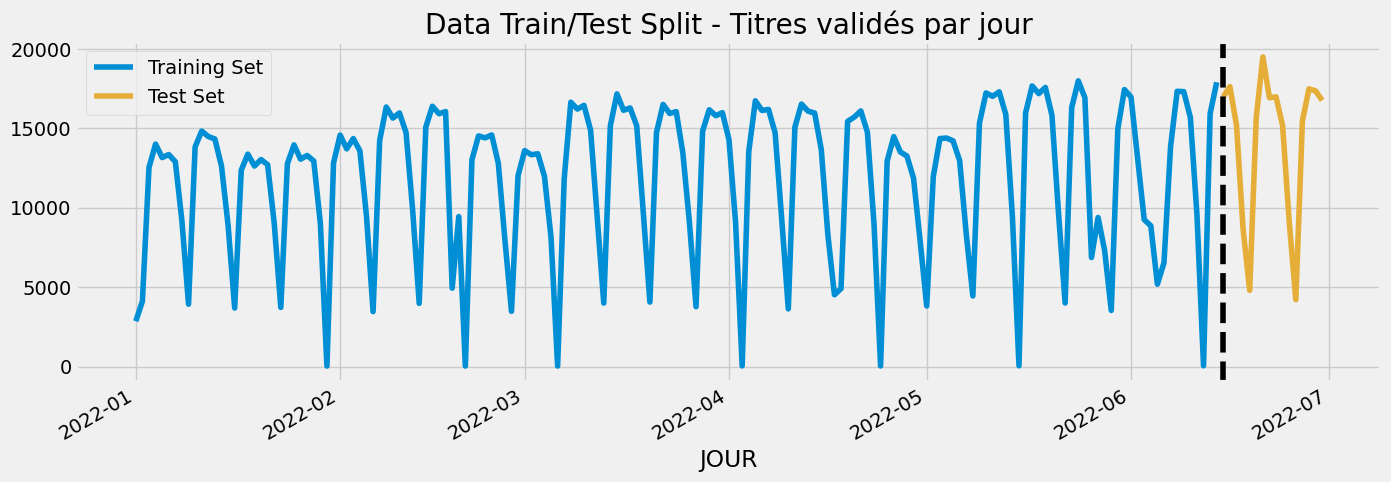

In [26]:

fig, ax = plt.subplots(figsize=(15, 5))
montrouge_train[[JOUR, NB_VALD]].groupby(JOUR).sum().reset_index().set_index(JOUR).plot(ax=ax, label='Training Set', title='Data Train/Test Split - Titres validés par jour', color=color_pal[0])
montrouge_test[[JOUR, NB_VALD]].groupby(JOUR).sum().reset_index().set_index(JOUR).plot(ax=ax, label='Test Set', color=color_pal[2])
ax.axvline('2022-06-15', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

#### Build ML Model with XG Boost


In [27]:
features = montrouge_engineer.drop([JOUR, NB_VALD, LIBELLE_ARRET], axis=1).columns
target = NB_VALD
def select_features_target_train_test(df: pd.DataFrame, station: str, features: list = features, target: str = target) -> tuple:
    df_engineered = feature_engineering(select_station(df=df, nom_station=station))
    train, test = split_data(df=df_engineered)
    X_train = train[features]
    y_train = train[target]

    X_test = test[features]
    y_test = test[target]
    return X_train, X_test, y_train, y_test



#### Create Model

In [28]:
import os
path_models_store = "./saved_models/"
if not os.path.exists(path_models_store):
    os.mkdir(path_models_store)



In [29]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
import pickle

def find_boosting_model(station: str):
    # get train and test sets
    X_train, X_test, y_train, y_test = select_features_target_train_test(df=df_validation, station=station)
    # create search space for the hyperparameters
    param_grid = {
        'learning_rate': [0.01, 0.1, 0.5],
        'max_depth': [3, 5, 7, 10],
        'n_estimators': [50, 100, 200, 1000],
    }

    model = XGBRegressor(objective='reg:squarederror')
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=False)

    grid_search.fit(X_train, y_train)
    
    best_params = grid_search.best_params_
    best_model = XGBRegressor(objective='reg:squarederror', **best_params)
    best_model.fit(X_train, y_train)
    # saving the trained_model to models_store
    station_renamed = station.replace(" ", "_")
    path_best_model = os.path.join(path_models_store, f"trained_model_{station_renamed}.pickle")
    with open(path_best_model, 'wb') as f:
        pickle.dump(best_model, f)
        print(f"Modèle sauvegardé sous: {path_best_model}")
        print()
        
    y_pred = best_model.predict(X_test)
    y_train_pred = best_model.predict(X_train)
    r2_test = r2_score(y_true=y_test, y_pred=y_pred)
    r2_train = r2_score(y_true=y_train, y_pred=y_train_pred)
    mse_test = mean_squared_error(y_true=y_test, y_pred=y_pred)
    mse_train = mean_squared_error(y_true=y_train, y_pred=y_train_pred)
    print("best parameters: ", best_params)
    print()
    print("Metriques sur les données de test...")
    print()
    print("MSE test: ", mse_test)
    print("RMSE test: ", np.sqrt(mse_test))
    print("MAPE test", mean_absolute_percentage_error(y_true=y_test, y_pred=y_pred))
    print("R2 test:", r2_test)
    print()
    print("Métriques sur les données d'entrainement ...")
    print()
    print("MSE train: ", mse_train)
    print("RMSE train: ", np.sqrt(mse_train))
    print("MAPE train", mean_absolute_percentage_error(y_true=y_train, y_pred=y_train_pred))
    print("R2 train:", r2_train)


    return best_model


### Entrainement des modèles (peut prendre du temps)

`WARNING`: Pour simplifier le notebook on a sauvegardé chaque modèle dans un fichier .pickle. On peut réentrainer les modèles en exécutant les codes commentés.

In [30]:
# WARNING: Décommenter seulement la ligne ci-après pour réentrainer le model au besoin en faisant un gridsearch
# model_olympiades = find_boosting_model(station=OLYMPIADES)


# WARNING: Décommenter tout le bloc suivant pour utiliser les hyper-paramètres
# best_params_olympiades = {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
# X_train_olympiades, _, y_train_olympiades, _ = select_features_target_train_test(df=df_validation, station=OLYMPIADES)
# model_olympiades = XGBRegressor(objective='reg:squarederror', **best_params_olympiades)
# model_olympiades.fit(X_train_olympiades, y_train_olympiades)

path_saved_model_olympiades = "./saved_models/trained_model_OLYMPIADES.pickle"
with open(path_saved_model_olympiades, "rb") as f:
    model_olympiades = pickle.load(f)


### Meilleurs paramètres et métriques pour OLYMPIADES:
best parameters:  {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}

Metriques sur les données de test...

- MAE test:  252.6039336654875
- RMSE test:  378.32265649702606
- R2 test: 0.9850855623508684


Métriques sur les données d'entrainement ...

- MAE train:  267.3350163032712
- RMSE train:  529.6954946875661
- R2 train: 0.9688833877118496

**Note:** Comme on le voit il y a un overfit. On peut régler le problème en faisant du monitoring pour stopper l'entrainement.

In [31]:
# WRNING : Décommenter seulement la ligne ci-après pour réentrainer le model au besoin en faisant un gridsearch
# model_montrouge = find_boosting_model(station=MONTROUGE)

# WARNING : Décommenter tout le bloc suivant pour utiliser les hyper-paramètres
# best_params_montrouge = {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
# X_train_montrouge, _, y_train_montrouge, _ = select_features_target_train_test(df=df_validation, station=MONTROUGE)
# model_montrouge = XGBRegressor(objective='reg:squarederror', **best_params_montrouge)
# model_montrouge.fit(X_train_montrouge, y_train_montrouge)

path_saved_model_montrouge = "./saved_models/trained_model_M._MONTROUGE.pickle"
with open(path_saved_model_montrouge, "rb") as f:
    model_montrouge = pickle.load(f)

### Meilleurs paramètres et métriques pour Montrouge :

best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}

Metriques sur les données de test...

- MAE test:  244.69752953284316
- RMSE test:  455.6192018836307
- R2 test: 0.9746433885922264

Métriques sur les données d'entrainement ...

- MAE train:  149.49895936713637
- RMSE train:  370.885644651597
- R2 train: 0.9764707914220265


**Il y a également un overfit**

In [34]:
from sklearn.metrics import mean_absolute_percentage_error, r2_score

#### Comparaison entre la prédiction et la réalité

In [32]:
def error_pred_real(model, station: str):
    _, X_test, _, y_test = select_features_target_train_test(df=df_validation, station=station)
    y_pred = model.predict(X_test)
    df_error_montrouge = pd.DataFrame({f"{NB_VALD}_true": y_test, f"{NB_VALD}_pred": y_pred, "absolute_error": np.abs(y_test - y_pred)})
    df_error_montrouge[JOUR] = montrouge_test.JOUR
    return df_error_montrouge


In [33]:
error_olympiades =  error_pred_real(model=model_olympiades, station="OLYMPIADES")
error_olympiades.head()

,NB_VALD_true,NB_VALD_pred,absolute_error,JOUR
1485,11585.0,11092.041016,492.958984,2022-06-19
1486,20.0,148.398621,128.398621,2022-06-19
1487,1004.0,873.979614,130.020386,2022-06-20
1488,1598.0,1378.800293,219.199707,2022-06-20
1489,3697.0,4450.544922,753.544922,2022-06-20


In [34]:
def plot_error(station: str, model=None, date_to_split=date_to_split):
    if station == "OLYMPIADES":
        model = model_olympiades
    elif station == "M. MONTROUGE":
        model = model_montrouge
    else:
        print(fr"""Create and save the model first with the following command `model_{station} = find_boosting_model(station="{station}")`""")
        print("The training might take a while")
        print(fr"""Then call this function with the command `plot_error(station={station}, model=model_{station})`""")
        model = None
    if model:
        df_error_station = error_pred_real(model=model, station=station)
        fig, ax = plt.subplots(figsize=(15, 5))
        df_error_station.drop("absolute_error", axis=1).groupby(JOUR).sum().reset_index().set_index(JOUR).plot(ax=ax,
        style='-', 
        title=f"Sommes des titres validés à {station} à partir du {date_to_split.date()}"
        )
        plt.show()


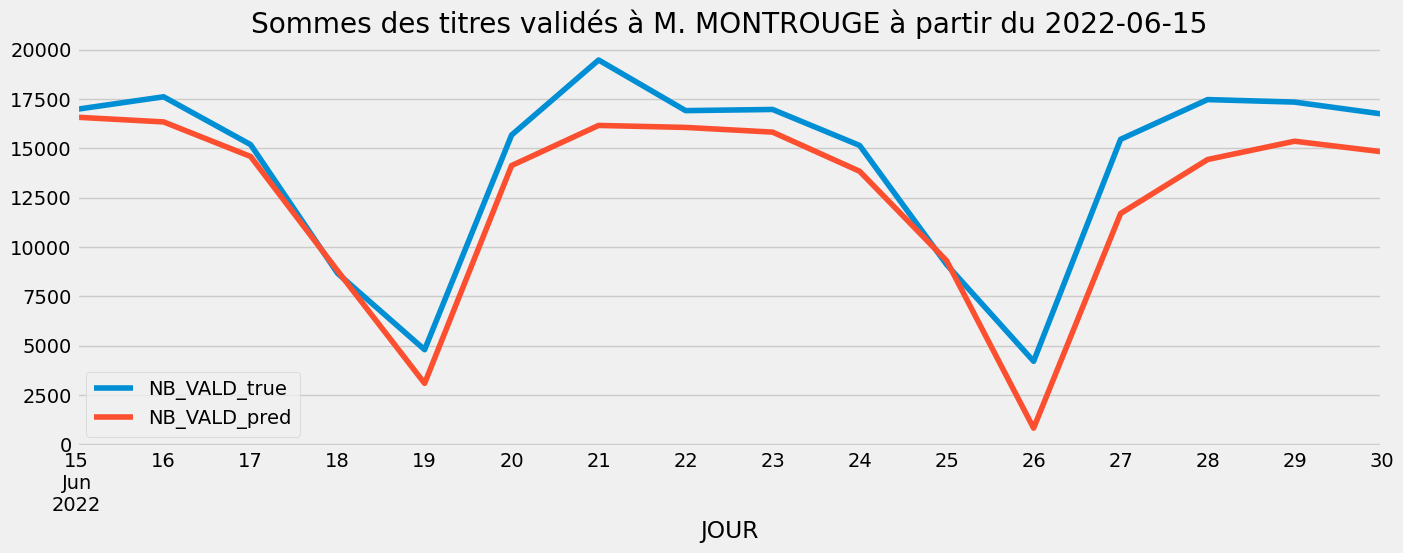

In [35]:
plot_error(station="M. MONTROUGE")

In [36]:

plot_error(station="CLICHY")

Create and save the model first with the following command `model_CLICHY = find_boosting_model(station="CLICHY")`
The training might take a while
Then call this function with the command `plot_error(station=CLICHY, model=model_CLICHY)`


# Trouver 10 paires de stations dont les noms sont proches.

##### Pour cette question : on a plusieurs choix en fonction des besoins métier. On peut utiliser la distance de Levenshtein ou alors utiliser une méthode forte de similarité (cosine_similarity) même si cette dernière méthode ne semble pas appropriée puisqu'il s'agit de trouver la similarité entre des mots et non de documents. Néanmoins, cette deuxième méthode donne également des résultats.

##### ** On utilisera la distance de Levenshtein**

In [37]:
import re
import itertools
import Levenshtein
# def preprocess_names(names):
#     # Preprocess names by converting to lowercase and removing special characters
#     preprocessed_names = [re.sub("[\-\'\s]*", "", name.lower()) for name in names]
#     return preprocessed_names

def similarity_levenshtein(names, threshold: float = 0.7):
    num_names = len(names)
    # preprocessed_names = preprocess_names(names)
    pairs = {}
    for i, j in itertools.combinations(range(num_names), 2):
        levenshtein_ratio = Levenshtein.ratio(names[i].lower(), names[j].lower())
        if levenshtein_ratio > threshold:
            pairs[(names[i], names[j])] = levenshtein_ratio
    df_pairs  = pd.Series(pairs).reset_index()
    df_pairs.columns = ["nom_1", "nom_2", "similarite"]

    return df_pairs.sort_values(by="similarite", ascending=False).reset_index(drop=True)

noms_stations = df_validation.LIBELLE_ARRET.unique()

noms_proches_levenshtein = similarity_levenshtein(noms_stations, threshold=0.7)
# for pair in noms_proches_levenshtein:
#     print(pair)
noms_proches_levenshtein.head(10)

,nom_1,nom_2,similarite
0,LIVRY-SUR-SEINE,IVRY-SUR-SEINE,0.965517
1,PORTE DE CLICHY,PTE DE CLICHY,0.928571
2,PONT CARDINET,PONT-CARDINET,0.923077
3,BILLANCOURT,BALLANCOURT,0.909091
4,AEROPORT CHARLES DE GAULLE 1,AEROPORT CHARLES DE GAULLE 2-TGV,0.900000
5,IVRY-SUR-SEINE,VITRY-SUR-SEINE,0.896552
6,PORTE DE SAINT-CLOUD,PORTE DE SAINT-OUEN,0.871795
7,PORTE DE CLICHY,PORTE-DE-CLICHY,0.866667
8,LIVRY-SUR-SEINE,VITRY-SUR-SEINE,0.866667
9,CHAMPAGNE-SUR-SEINE,CHAMPAGNE-SUR-OISE,0.864865
